# 使用逻辑回归进行手写数字识别

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from tool.Read_Minist_Tool import *
from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
train_images = load_train_images()
train_labels = load_train_labels()

test_images = load_test_images()
test_labels = load_test_labels()

魔数:2051, 图片数量: 60000张, 图片大小: 28*28
16
>784B 16 784
已解析 10000张
7839232
已解析 20000张
15679232
已解析 30000张
23519232
已解析 40000张
31359232
已解析 50000张
39199232
已解析 60000张
47039232
魔数:2049, 图片数量: 60000张
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张
魔数:2051, 图片数量: 10000张, 图片大小: 28*28
16
>784B 16 784
已解析 10000张
7839232
魔数:2049, 图片数量: 10000张
已解析 10000张


查看数据维度

In [3]:
train_images.shape

(60000, 28, 28)

##### 查看前十个对象及其对应的标签

5.0


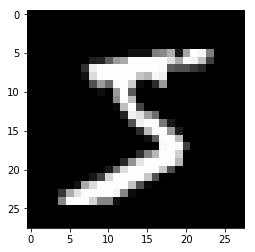

0.0


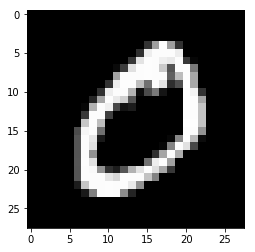

4.0


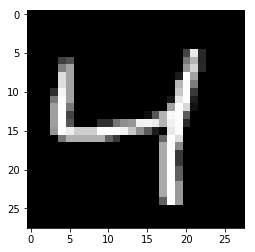

1.0


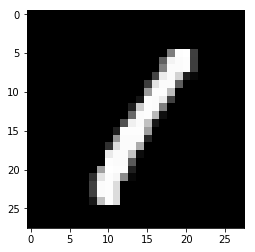

9.0


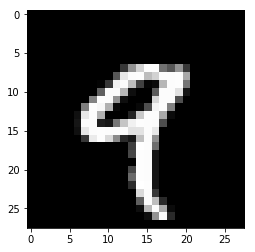

2.0


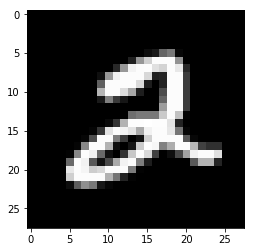

1.0


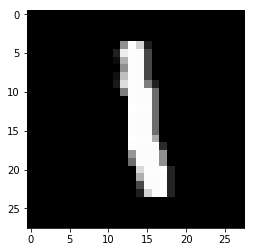

3.0


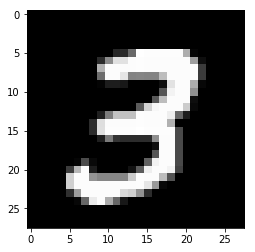

1.0


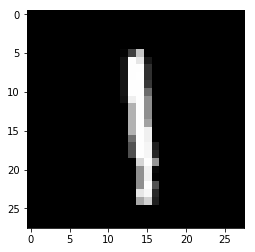

4.0


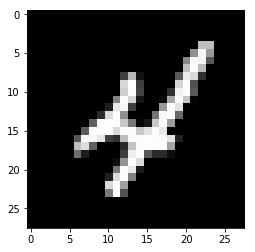

In [4]:
for i in range(10):
    print(train_labels[i])
    plt.imshow(train_images[i],cmap='gray')
    plt.show()

##### 构建训练数据特征
把X转换成6000行，28*28列的矩阵。

In [5]:
X = train_images.reshape(train_images.shape[0],-1)
X.shape

(60000, 784)

数据归一化

In [6]:
X = X/255

为了程序尽快训练完，取一部分训练数据进行训练，实际操作时不需这样做

In [7]:
X = X[0:1000,]
train_labels = train_labels[0:1000,]

##### 代入模型

In [8]:
model = linear_model.LogisticRegression(C=50)
model.fit(X,train_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
print(model.coef_)
print(model.intercept_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[-2.20194004 -0.91385417 -2.70454897 -2.69911654 -1.64210006 -0.57001404
 -1.761514   -1.32422124 -8.69424126 -4.69647913]


##### 测试模型

测试集精度

In [11]:
X_test = test_images.reshape(test_images.shape[0],-1)
X_test = X_test/255
y_test_hat = model.predict(X_test)
print('测试集精确度=',accuracy_score(test_labels,y_test_hat))

测试集精确度= 0.8476


训练集精度

In [10]:
y_train_hat = model.predict(X)
print('训练集精确度=',accuracy_score(train_labels,y_train_hat))


训练集精确度= 1.0
